<a href="https://colab.research.google.com/github/K-Kilel/Hypothyroidism-Predictive-Model/blob/main/Hypothyroidism_Predictive_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **HYPOTHYROID PREDICTIVE MODEL**

**RESEARCH QUESTION**

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

**METRICS FOR SUCCESS**

Create a predictive using two advanced decision trees to Random forests, Ada boosted trees or gradient boosted trees and optimize to get accurate results.

Apply Polynomial, linear and rbf kernel function to build your SVM model.

The models should have an accuracy greater than 80%.

**UNDERSTANDING THE CONTEXT** 

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to create a predictive model.

**EXPERIMENTAL DESIGN**

Define the question, the metric for success, the context, experimental design taken.

Read and explore the given dataset.

Define the appropriateness of the available data to answer the given question.

Find and deal with outliers, anomalies, and missing data within the dataset.

Perform univariate, bivariate and multivariate analysis recording your observations.

Performing regression analysis as a base model.

Create a model based on decision trees.

Create a model based on SVM.

Conclusion.


**DATA RELEVANCE**

This data was collected by Nairobi Hospital. The link to the dataset is provided below:

http://bit.ly/hypothyroid_data

## **Reading the Data**

In [279]:
# Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### **Reading the data**

In [280]:
# loading the dataset 
hypo_df = pd.read_csv('hypothyroid.csv')


### **Checking the data**

In [281]:
# Previewing the top records of the dataset

hypothyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0,y,15,y,1,y,10,n,0
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1,y,19,y,1,y,17,n,0
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0,y,4,y,1,y,0,n,0
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0,y,6,y,1,y,6,n,0
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7,y,1,y,57,y,1,y,44,n,0


In [282]:
# Previewing the bottom records of the dataset

hypothyroid.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58.0,F,f,f,f,f,f,f,f,f,f,f,f,y,5,y,1,y,86,y,0,y,95,n,0
3159,negative,29.0,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,1,y,99,y,1,y,98,n,0
3160,negative,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,1,y,0,y,71,y,0,y,104,n,0
3161,negative,74.0,F,f,f,f,f,f,f,f,f,f,f,f,y,1,y,0,y,65,y,0,y,137,n,0
3162,negative,56.0,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1,y,139,y,0,y,143,n,0


In [283]:
# Determining the number of records in our dataset

hypothyroid.shape


(3079, 26)

In [284]:
# Checking the data types

hypothyroid.dtypes

status                       category
age                           float64
sex                            object
on_thyroxine                   object
query_on_thyroxine             object
on_antithyroid_medication      object
thyroid_surgery                object
query_hypothyroid              object
query_hyperthyroid             object
pregnant                       object
sick                           object
tumor                          object
lithium                        object
goitre                         object
TSH_measured                   object
TSH                             int64
T3_measured                    object
T3                              int64
TT4_measured                   object
TT4                             int64
T4U_measured                   object
T4U                             int64
FTI_measured                   object
FTI                             int64
TBG_measured                   object
TBG                             int64
dtype: objec

### **Tidying the Dataset**

###Missing Values

In [285]:
# Checking for missing data

hypothyroid.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

There are no missing data in our dataset

In [286]:
# Checking for duplicates

hypothyroid.duplicated().sum()

0

In [287]:
# Dropping the duplicates

hypothyroid.drop_duplicates(inplace=True)

In [288]:
# Previewing the unique values in each column

for column in hypothyroid.columns:           
  print(column)                                
  print(hypothyroid_1[column].unique())              
  print('\n')      

status
['hypothyroid', 'negative']
Categories (2, object): ['hypothyroid', 'negative']


age
[72. 15. 24. 77. 85. 64. 20. 42. 69. 75. 53. 59. 68. 50. 78. 65. 28. 43.
 40. 84. nan 83. 63. 73. 36. 27. 48. 71. 60. 34. 79. 62. 74. 32. 41. 70.
 29.  5. 58. 35. 51. 22. 16. 44. 39. 47. 18. 17. 88. 56. 30. 45. 66. 52.
 54. 80. 33. 38. 92. 67. 46. 13. 89. 61. 49. 26. 57. 31. 90. 81. 25. 37.
 76. 87. 23. 55. 86. 98. 21. 97.  1.  6. 14. 82. 11. 19.  9. 12. 10.  8.
  7.  4. 93.]


sex
['M', 'F', NaN]
Categories (2, object): ['M', 'F']


on_thyroxine
['f', 't']
Categories (2, object): ['f', 't']


query_on_thyroxine
['f', 't']
Categories (2, object): ['f', 't']


on_antithyroid_medication
['f', 't']
Categories (2, object): ['f', 't']


thyroid_surgery
['f', 't']
Categories (2, object): ['f', 't']


query_hypothyroid
['f', 't']
Categories (2, object): ['f', 't']


query_hyperthyroid
['f', 't']
Categories (2, object): ['f', 't']


pregnant
['f', 't']
Categories (2, object): ['f', 't']


sick
['f', 't

From the above code, we can see that,


Numerical columns = [ ' age ' , ' TSH ' , ' T3 ' , ' TT4 ' , ' T4U ' , ' FTI ' , ' TBG ' ]

Categorical columns = [ ' sex ' , ' on_thyroxine ' ,' query_on_thyroxine ' ,' on_antithyroid_medication ' , ' thyroid_surgery ' , ' query_hypothyroid ' , ' query_hyperthyroid ' , ' pregnant ' , 'sick ' , ' tumor ', ' lithium ' , ' goitre ' , ' TSH_measured ', ' T3_measured ' , ' TT4_measured ' , ' T4U_measured ' , ' FTI_measured' , ' TBG_measured ' ]

In [289]:
# Replacing '?' with zeros

hypothyroid['TBG'] = hypothyroid['TBG'].replace(['?'], 0)
hypothyroid['TSH'] = hypothyroid['TSH'].replace(['?'], 0)
hypothyroid['T3'] = hypothyroid['T3'].replace(['?'], 0)
hypothyroid['TT4'] = hypothyroid['TT4'].replace(['?'], 0)
hypothyroid['T4U'] = hypothyroid['T4U'].replace(['?'], 0)
hypothyroid['FTI'] = hypothyroid['FTI'].replace(['?'], 0)


In [290]:
# Replace '?' with mean age

hypothyroid['age'] = hypothyroid['age'].replace(['?'], 0)

In [291]:
# Changing the column datatypes to the correct ones

num_col = ['age', 'T3','TSH', 'TT4', 'T4U', 'FTI' , 'TBG']
                                 
for column in hypothyroid.columns:
  if column in num_col :
    hypothyroid[column] = pd.to_numeric(hypothyroid[column])

hypothyroid.dtypes

status                       category
age                           float64
sex                            object
on_thyroxine                   object
query_on_thyroxine             object
on_antithyroid_medication      object
thyroid_surgery                object
query_hypothyroid              object
query_hyperthyroid             object
pregnant                       object
sick                           object
tumor                          object
lithium                        object
goitre                         object
TSH_measured                   object
TSH                             int64
T3_measured                    object
T3                              int64
TT4_measured                   object
TT4                             int64
T4U_measured                   object
T4U                             int64
FTI_measured                   object
FTI                             int64
TBG_measured                   object
TBG                             int64
dtype: objec

In [292]:
hypothyroid['age'] = hypothyroid['age'].fillna(hypothyroid['age'].mean(), axis=0)

In [293]:
# Replacing NaN values in the sex column with the modal value

hypothyroid['sex']= hypothyroid['sex'].fillna(hypothyroid['sex'].mode(), axis = 0)



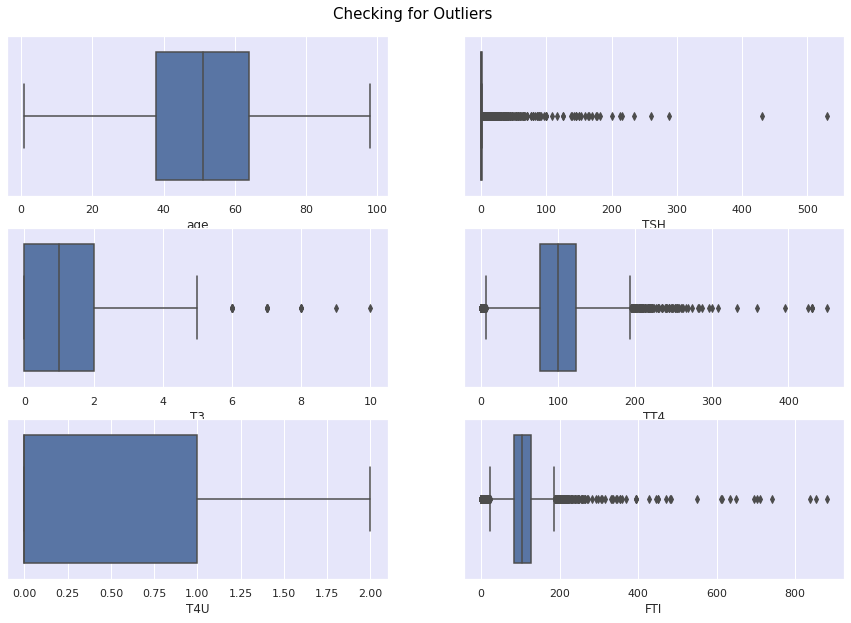

In [294]:
# Checking for outliers

num_col = [ 'age' , 'TSH' , 'T3' , 'TT4' , 'T4U' , 'FTI' , 'TBG' ]
#colors = ['orange', 'red', 'green', 'yellow', 'pink', 'fuchsia']
fig, axes = plt.subplots(nrows= 3, ncols= 2, figsize = (15,10))
plt.suptitle('Checking for Outliers', fontsize = 15, y=0.92, color = 'black')
for ax, data, column in zip(axes.flatten(),hypothyroid, num_col):
  sb.boxplot(hypothyroid[column], ax=ax)
  ax.set_facecolor('lavender')



Only the age column does not have outliers 


## **Exploratory Analysis**

### **Univariate Analysis**

In [295]:
# Checking the column of status
hypothyroid.status.describe()

count         3079
unique           2
top       negative
freq          2938
Name: status, dtype: object

51.12003029155589




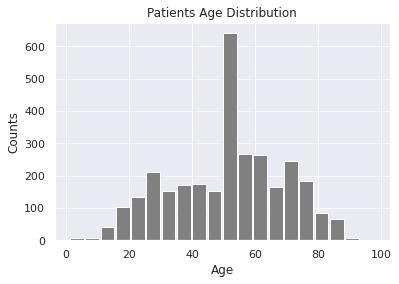

In [296]:
# Understanding the age of the patients

print(hypothyroid['age'].mean())
print('\n')
size, scale = 1000, 10
age = hypothyroid['age']

age.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='grey')
plt.title('Patients Age Distribution')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

The distribution is fairly normal. The distribution is more concentrated around the mean

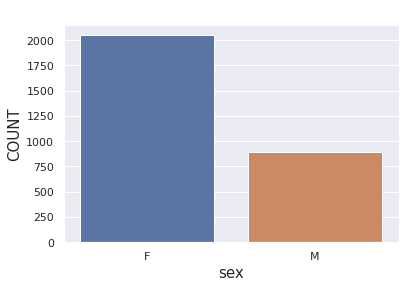

In [297]:
#visualizing the distribution of gender in the dataset
sb.countplot('sex',data = hypothyroid_7)
plt.xlabel("sex",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.title("Countplot of Gender",fontsize=16,color="white")
plt.show()
#

There are more female patients than the male patients.


### **Visualizing the other numeric columns**

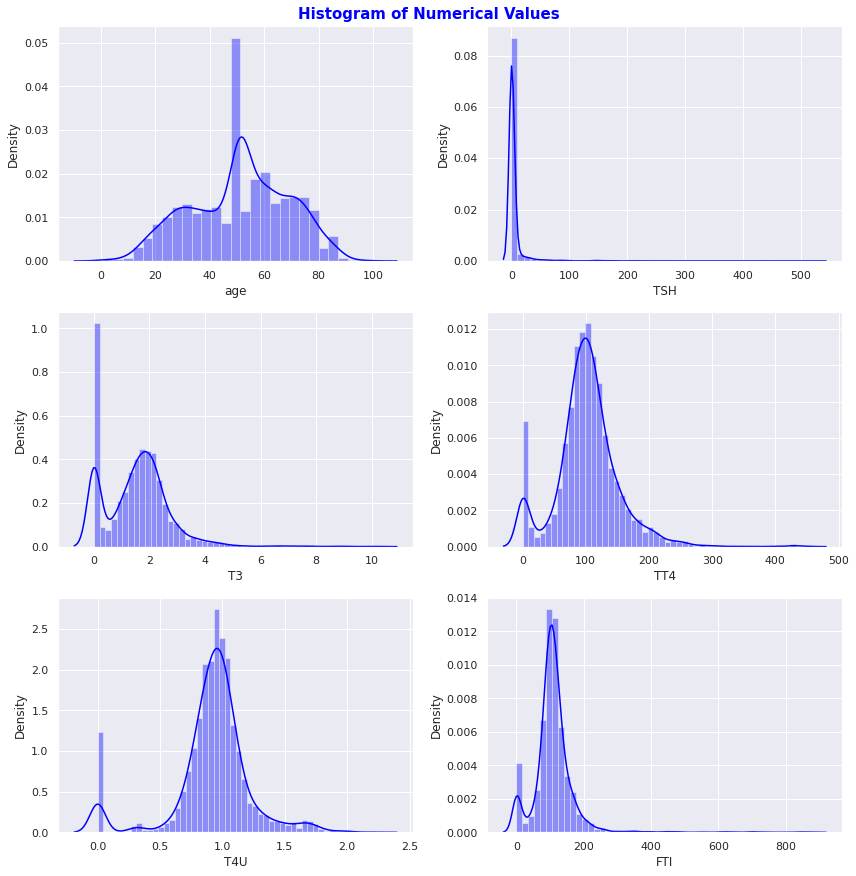

In [298]:
# Visualizing their distributions using histograms
sb.set_style('darkgrid')
fig, axes = plt.subplots(nrows=3, ncols = 2, figsize = (12, 12))
fig.suptitle('Histogram of Numerical Values', y= 1.01, color = 'blue', fontsize = 15, weight = 'bold')

for ax, data, name in zip(axes.flatten(), hypothyroid_7, num_col):
  sb.distplot(hypothyroid_7[name], ax = ax, kde = True, color = 'blue')
plt.tight_layout()
plt.show()

TSH, T3,TT4, and FTI Columns are rightly skewed.

T4U has a fairly normal distribution.

##Other Categorical Columns:

#####Countplots

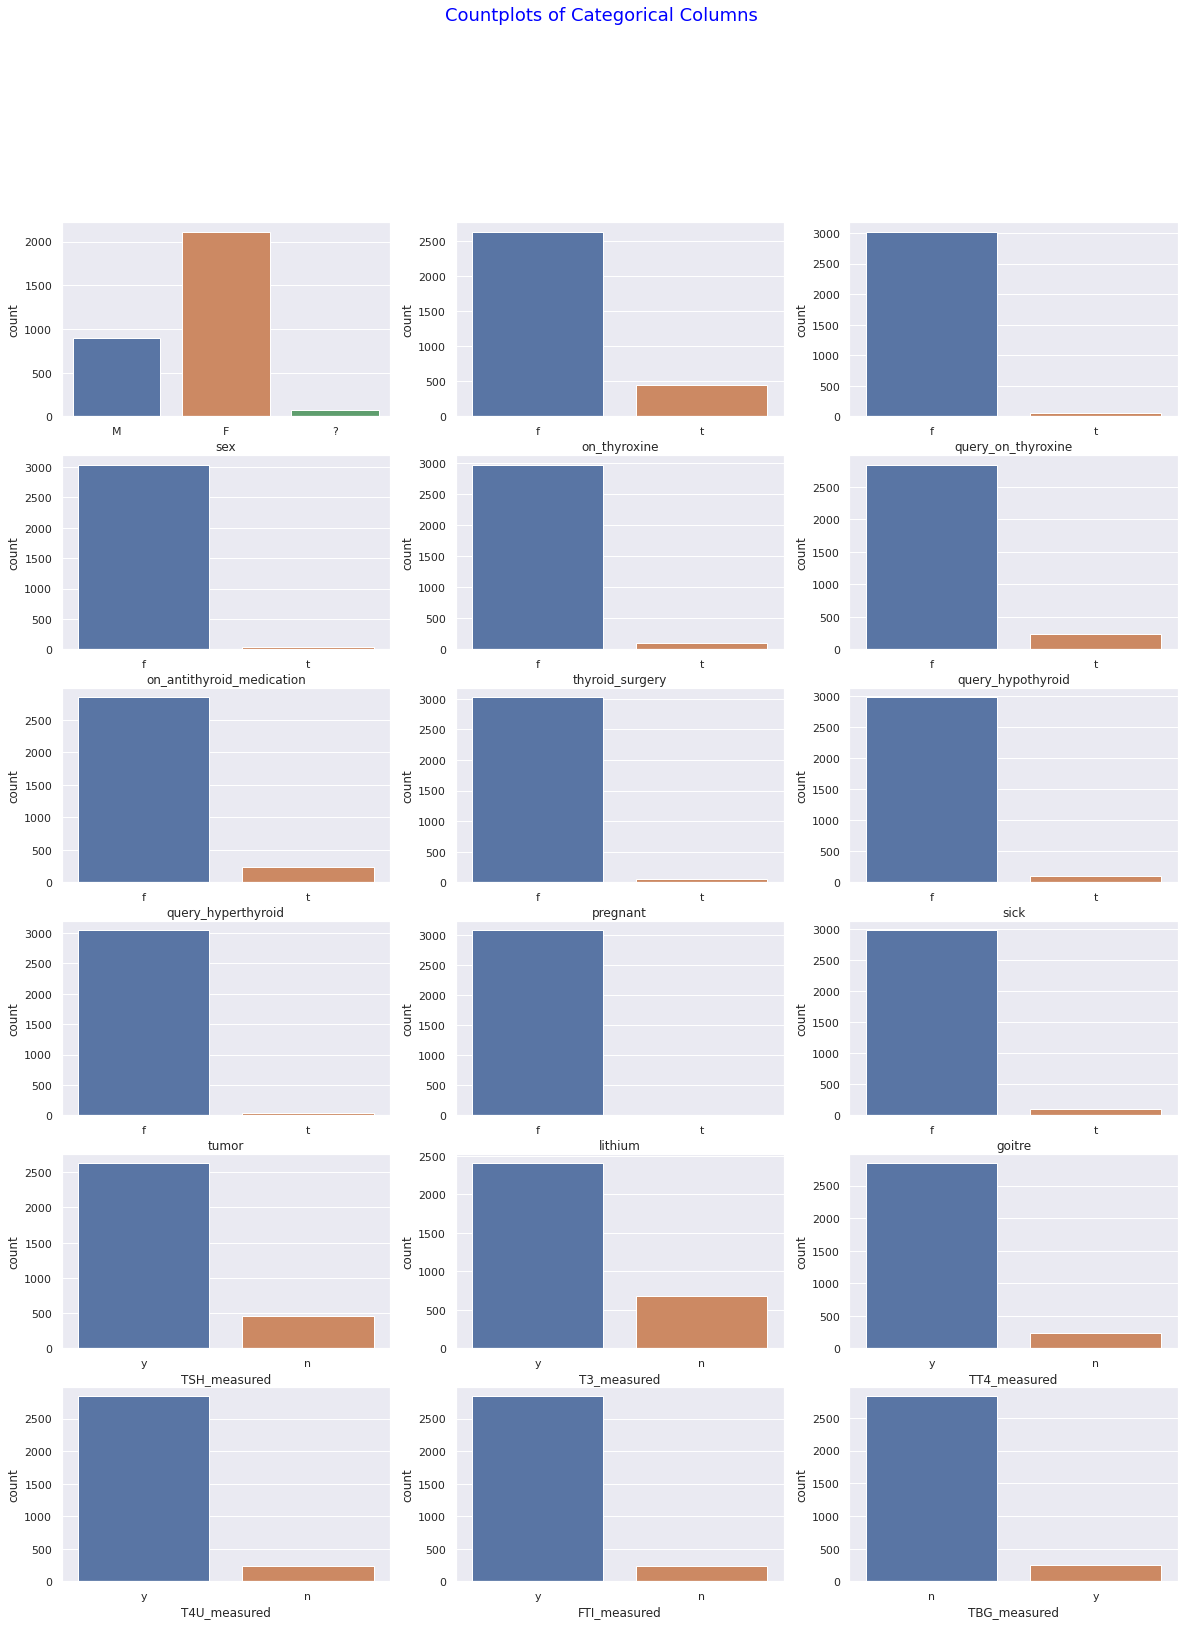

In [374]:
# Countplot of categorical columns in the dataset
# creating a list of the categorical columns in the dataset

categorical_columns =[ 'sex', 'on_thyroxine', 'query_on_thyroxine',
      'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
      'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
      'TSH_measured', 'T3_measured', 'TT4_measured',
      'T4U_measured', 'FTI_measured', 'TBG_measured']


sb.set(style = 'darkgrid', context = 'notebook')
corr = hypothyroid.corr()
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20,25))
plt.suptitle('Countplots of Categorical Columns', fontsize = 18, y = 1, color = 'blue')
for ax, data, column in zip(axes.flatten(), hypothyroid, categorical_columns):
   sb.countplot(hypothyroid[column], ax=ax)

# Bivariate Analysis

## Checking for Multi-collinearity

In [300]:
# Let's display the correlations between the variables
corr = hypothyroid_7.corr()
corr

,age,TSH,T3,TT4,T4U,FTI
age,1.000000,0.008882,-0.092772,-0.024667,-0.063006,0.057734
TSH,0.008882,1.000000,-0.092486,-0.242139,0.089875,-0.199480
T3,-0.092772,-0.092486,1.000000,0.463470,0.417634,0.290009
TT4,-0.024667,-0.242139,0.463470,1.000000,0.546467,0.738844
T4U,-0.063006,0.089875,0.417634,0.546467,1.000000,0.100747
FTI,0.057734,-0.199480,0.290009,0.738844,0.100747,1.000000


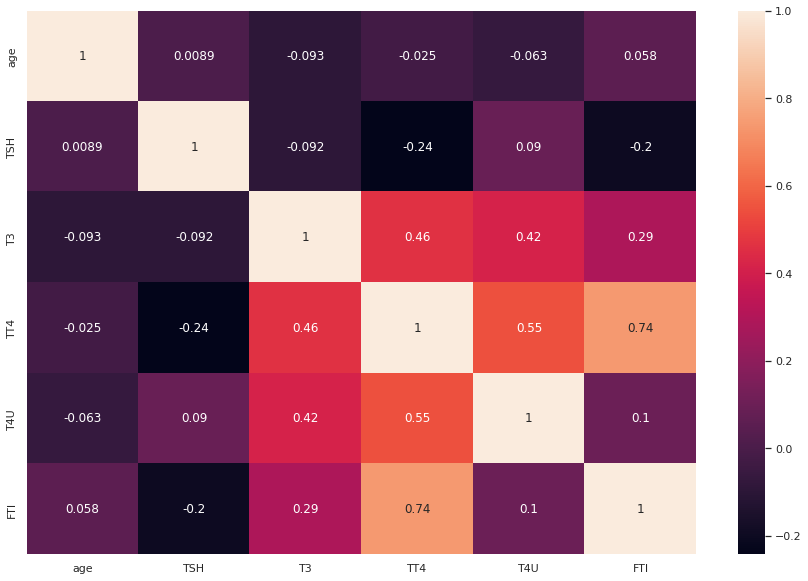

In [301]:
#visualizing correlation on a heatmap
plt.figure(figsize=(15,10))
sb.heatmap(corr, annot = True)
plt.show()

From the heat map above there are no strong correlation between the numerical values.

# Modelling


### **The Base Model: Logistic Regression**

In [388]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

hypothyroid['sex'] = label_encoder.fit_transform(hypothyroid['sex'])
hypothyroid['on_thyroxine'] = label_encoder.fit_transform(hypothyroid['on_thyroxine'])
hypothyroid['query_on_thyroxine'] = label_encoder.fit_transform(hypothyroid['query_on_thyroxine'])
hypothyroid['on_antithyroid_medication'] = label_encoder.fit_transform(hypothyroid['on_antithyroid_medication'])
hypothyroid['thyroid_surgery'] = label_encoder.fit_transform(hypothyroid['thyroid_surgery'])
hypothyroid['query_hypothyroid'] = label_encoder.fit_transform(hypothyroid['query_hypothyroid'])
hypothyroid['pregnant'] = label_encoder.fit_transform(hypothyroid['pregnant'])
hypothyroid['tumor'] = label_encoder.fit_transform(hypothyroid['tumor'])
hypothyroid['lithium'] = label_encoder.fit_transform(hypothyroid['lithium'])
hypothyroid['goitre'] = label_encoder.fit_transform(hypothyroid['goitre'])
hypothyroid['TSH_measured'] = label_encoder.fit_transform(hypothyroid['TSH_measured'])
hypothyroid['T3_measured'] = label_encoder.fit_transform(hypothyroid['T3_measured'])
hypothyroid['TT4_measured'] = label_encoder.fit_transform(hypothyroid['TT4_measured'])
hypothyroid['T4U_measured'] = label_encoder.fit_transform(hypothyroid['T4U_measured'])
hypothyroid['FTI_measured'] = label_encoder.fit_transform(hypothyroid['FTI_measured'])
hypothyroid['TBG_measured'] = label_encoder.fit_transform(hypothyroid['TBG_measured'])
hypothyroid['status'] = label_encoder.fit_transform(hypothyroid['status'])


hypothyroid.dtypes

status                         int64
age                          float64
sex                            int64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
thyroid_surgery                int64
query_hypothyroid              int64
query_hyperthyroid            object
pregnant                       int64
sick                          object
tumor                          int64
lithium                        int64
goitre                         int64
TSH_measured                   int64
TSH                            int64
T3_measured                    int64
T3                             int64
TT4_measured                   int64
TT4                            int64
T4U_measured                   int64
T4U                            int64
FTI_measured                   int64
FTI                            int64
TBG_measured                   int64
TBG                            int64
dtype: object

In [392]:
from sklearn.linear_model import LogisticRegression

X = hypothyroid.drop(['status'], axis= 1)

X = pd.get_dummies(X)

y= hypothyroid['status'].values

# Split the independent and dependent variables

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fitting the model
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

# Predicting 
y_pred = LogReg.predict(X_test)


In [393]:
print('accuracy_score:',accuracy_score (y_test , y_pred))

confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

accuracy_score: 0.9859307359307359


array([[ 29,  10],
       [  3, 882]])

The accuracy of the Logistic Regression is 98.5%


## **Decision Trees**

### **Random forests**

### **Ada boosted trees**

In [394]:
# Splittting the features and target
X = hypothyroid.drop(['status'], axis= 1)

X = pd.get_dummies(X)

y= hypothyroid['status'].values

# Splitting the test and training features

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [395]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Fitting the model 

ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
                          n_estimators=300, random_state=42)

ada_boost = ada_boost.fit(X_train, y_train)

# Predicting using the model

y_pred_ada = ada_boost.predict(X_test)

# Checking the accuracy score
print('accuracy_score:', accuracy_score(y_test, y_pred_ada))

accuracy_score: 0.9886363636363636


In [396]:
# Checking the confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred_ada)
confusion_matrix

array([[ 26,   4],
       [  3, 583]])

### **Gradient Boosted Trees**

In [397]:
# Importing required libraries

from sklearn.ensemble import GradientBoostingClassifier

# Splitting the test and training features

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [398]:

# Fitting the model

gbc = GradientBoostingClassifier(n_estimators= 300, learning_rate=0.1, max_depth=5)
gbc = gbc.fit(X_train, y_train)

# Predicting using the model
y_pred_gbc = gbc.predict(X_test)

# Checking the accuracy of the score
print('accuracy_score:',accuracy_score (y_test , y_pred_gbc))

accuracy_score: 0.9886363636363636


In [399]:
# Checking the accuracy and the confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred_gbc)
confusion_matrix

array([[ 27,   3],
       [  4, 582]])

Both decision trees have significantly high accuracy. 

### **Support Vector Machines**

### **Polynomial SVM**

In [401]:
# Splittting the features and target
X = hypothyroid.drop(['status'], axis= 1)

X = pd.get_dummies(X)

y= hypothyroid['status'].values

# Splitting the test and training features

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [402]:
# Importing the required Libraries
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Building the model 
polyclassifier = SVC(kernel='poly',degree=3,gamma='auto')
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

SVC(gamma='auto', kernel='poly')

In [403]:
from sklearn.metrics import confusion_matrix
# making prediction
y_pred = polyclassifier.predict(X_test)

# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9756493506493507
[[ 26   4]
 [ 11 575]]


### **Linear SVM**

In [404]:
from sklearn.svm import SVC

# Fitting the model

hypo_model = SVC(kernel = 'linear')

# training the model
hypo_model.fit(X_train, y_train)

# Predicting
y_pred = hypo_model.predict(X_test)


In [405]:
# Checking the accuracy of the model
model_accuracy = accuracy_score(y_test, y_pred)
print(model_accuracy)


# Checking the confusion matrix

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

print(confusion_matrix)

0.9805194805194806
[[ 21   9]
 [  3 583]]


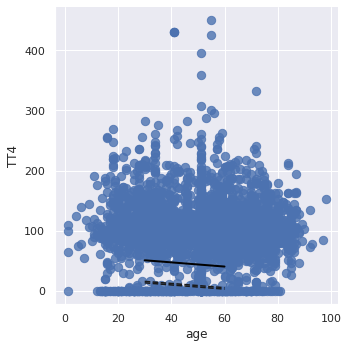

In [406]:

# Plot the parallels to the separating hyperplane that pass through the support vectors
b = hypo_model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = hypo_model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# Look at the margins and support vectors
sb.lmplot('age', 'TT4', data=hypothyroid, palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--') #'k--' indicates that we want to draw a black dotted line
plt.plot(xx, yy_up, 'k--')
plt.scatter(hypo_model.support_vectors_[:, 0], hypo_model.support_vectors_[:, 1],s=80, facecolors='none');

### **Radial Basis Function**

In [407]:

# Building the model 
rbfclassifier = SVC(kernel='rbf')
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

SVC()

In [408]:
# making prediction
y_pred = rbfclassifier.predict(X_test)

In [409]:
from sklearn.metrics import confusion_matrix
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9756493506493507
[[ 18  12]
 [  3 583]]


It is clear that the Polynomial kernel has the highest accuracy score of 98.5%.

### **Challenging the Solution**

In [367]:
# to get the most importantfeatures
tree = forest.estimators_[50]

features = X

importances = list(tree.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance 
                       in zip(features, importances)]
# sort in descending order
feature_importances = sorted(feature_importances, key = lambda x: x[1], 
                             reverse = True)
[print('Variable: {:20} Importnace: {}'.format(*pair)) for pair in feature_importances];
#the list below shows the most important features in the data and the value of how important they are.
# the most important feature is TT4 and it accounts for 79% importance

Variable: FTI                  Importnace: 0.58
Variable: TSH                  Importnace: 0.31
Variable: T3                   Importnace: 0.05
Variable: on_thyroxine_f       Importnace: 0.02
Variable: age                  Importnace: 0.01
Variable: sex_F                Importnace: 0.01
Variable: T3_measured_n        Importnace: 0.01
Variable: TT4                  Importnace: 0.0
Variable: T4U                  Importnace: 0.0
Variable: TBG                  Importnace: 0.0
Variable: sex_?                Importnace: 0.0
Variable: sex_M                Importnace: 0.0
Variable: on_thyroxine_t       Importnace: 0.0
Variable: query_on_thyroxine_f Importnace: 0.0
Variable: query_on_thyroxine_t Importnace: 0.0
Variable: on_antithyroid_medication_f Importnace: 0.0
Variable: on_antithyroid_medication_t Importnace: 0.0
Variable: thyroid_surgery_f    Importnace: 0.0
Variable: thyroid_surgery_t    Importnace: 0.0
Variable: query_hypothyroid_f  Importnace: 0.0
Variable: query_hypothyroid_t  Importna

In [371]:
#creating a new set of independent variables based on their importance
X1 = hypothyroid[['TSH', 'FTI', 'age', 'T3','sex']]
X1 = pd.get_dummies(X1)

In [410]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=0)

#from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier


gbc = GradientBoostingClassifier(n_estimators= 300, learning_rate=0.1, max_depth=5)
gbc = gbc.fit(X_train, y_train)

# Predicting using the model
y_pred_gbc = gbc.predict(X_test)

# Checking the accuracy of the score
print('accuracy_score:',accuracy_score (y_test , y_pred_gbc))

accuracy_score: 0.9891774891774892


### **Conclusion**
From our analysis, the important features are TSH, FTI, age, T3,sex.

Using these important features gives an accuracy score of 98.9%. This means using the additional features underfits the data. 
